# MTH9875 Homework 9

Assigned: October 26, 2017.
Due: November 9, 2017 by 6pm.

Late homework **will not be accepted**.

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Victor Istratov (stavka@gmail.com), Yassine Ghalem (yassine.ghalem@gmail.com) and Jim Gatheral (jim.gatheral@gmail.com) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

* Author: Hongchao Pan
* Kernel Version: R 3.3.2
* Packages/Libraries: repr
* Notes:
    * Seems like the solution of Q4 is given.

In [ ]:
# Record the time
ptm<-proc.time()

### As usual, download some code

The following code sources *BlackScholes.R* which has the Black-Scholes formula and implied volatility computation and *Heston2.R* which has in particular the *impvolHeston* function.

In [1]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2017/10/BlackScholes.R.zip", destfile="BlackScholes.R.zip")
unzip(zipfile="BlackScholes.R.zip")
source("BlackScholes.R")
source("Heston2.R")
library(repr)
options(repr.plot.height=5)

## A special case of Heston: The Heston-Nandi model
$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
$$

If we believe the argument of Lecture 4 preceding formula (21), if $\rho=\pm1$, Heston local variance should be well approximated by (*e.g.* (4.1) on page 44 of The Volatility Surface):

<a name="eq:Hestonlv"></a>(1)
$$
\beas
 v_L(x_T,T) &=& \left[\hat v'_{ T} \,-\, \eta
 \,\frac{{x_T }}{{w_T }}\,\int_0^T {\hat v_s } \,e^{
 - \lambda '(T - s)} ds \right]^+\nonumber\\
 &=&\left[(v-\bar v') e^{ - \lambda' T} +\bar v' \,-\,\eta \, x_T
 \,\left\{ \frac{1-e^{-\lambda' T}}{\lambda' T } \right\}\right]^+
\eeas
$$

with $ \lambda ' = \lambda  +\frac { \eta}{2}$, $\bar v' = \bar v
\frac {\lambda }  {\lambda '}$.  The whole expression must be
bounded below by zero - all stock prices above the critical stock
price at which the local variance reaches zero are unattainable.







Following Chapter 4 of The
Volatility Surface, we will show this numerically by simulation.  For each of the problems below, take $T=1$ year as the time horizon with Heston parameters:
\begin{eqnarray*}
v&=& 0.04\\ \bar v &=& 0.04\\ \lambda&=&10\\ \eta&=&1\\\rho&=&-1.
\end{eqnarray*}



### 1. (16 points)

(a)

Use your Monte Carlo code (not QMC!) from HW6 Problem 4 to return vectors of $x=\log S_T/S_0$ and instantaneous variance $v$ with the above Heston-Nandi parameters.  Run the code with $N=2,000,000$ paths, $m=64$ (128 steps), and *evolve=evolveAlfonsiF* .  (Tip: Save the results so you can reuse these samples of $x$ and $v$ and avoid lengthy reruns of the MC code.)

(b)

Plot the Heston-Nandi 1-year implied variance smile for log-strikes between $-1.0$ and $1.0$.  Superimpose the implied volatility smile from the Heston quasi-closed form formula.  As usual, nice formatting please!

(c)

Consider the surface SVI (SSVI) parameterization

<a name="eq:ssvi"></a>(2)
$$
w(k,\theta_t)
= \frac{\theta_t}{2}\left\{1+\rho\varphi(\theta_t) k + \sqrt{\left(\varphi(\theta_t){k}+\rho\right)^2
+(1-\rho^2 )}\right\}.
$$

Set $t=1$.  Show that the ATM implied variance $\sigma_{\text{BS}}^2(0,1) = \theta$, and that the ATM variance skew $\p_k \sigma_{\text{BS}}^2(k,1)|_{k=0}= \rho\,\theta\,\varphi$.

(d)

Simplify the SSVI formula [(2)](#eq:ssvi) in the special case where $\rho=-1$. 

(e)

Estimate the Monte Carlo ATM implied variance level and skew.  Assuming $\rho=-1$, deduce $\theta$ and $\varphi$.  Display the resulting SSVI fit on the plot obtained in part (b).  

<font color='blue'>
###  Answer of Q1

#### Answer of (a)

In [2]:
# Alfonsi code with full truncation
evolveAlfonsiF <- function(v,x,dt,W1,W2){

        eldt2 <- exp(-lambda*dt/2);

        #Variance process
        vbarp <- vbar - eta^2/(4*lambda);
        psi <- (1-eldt2)/lambda;
        v1 <- v*eldt2+lambda*vbarp*psi;
        v2 <- (v1 > 0) * v1; # Take v2 = 0 if v1<0, else v2=v1
        par <- sqrt(v2) + eta/2 * sqrt(dt)*W2;
        vf <- eldt2*par*par +lambda*vbarp*psi + v1 - v2;
                                # Full truncation

        # Log-stock process (Andersen equation (33))
        vvf <- (v+vf > 0) * (v+vf);
        dw <- vvf/2*dt;
        x <- x  - dw/2 + rho2m1*sqrt(dw)*W1 +
            rho/eta*(lambda*dw + vf-v -lambda*vbar*dt) ;
        # Impose martingale constraint
        x <- x - log(mean(exp(x)));
        v <- vf;
        return(cbind(x,v));
}

# Monte Carlo (return vectors of x and v)
HestonMC <- function(params){
    res <- function(T, N, m, evolve)
    {
  
    lambda <<- params$lambda;
    rho <<- params$rho;
    eta <<- params$eta;
    vbar <<- params$vbar;
    v0 <<- params$v;
    
    n <- m*2 #n is number of timesteps = 2*m so we can use Romberg extrapolation
    rho2m1 <<- sqrt(1-rho*rho)
  
    # We use a vertical array, one element per M.C. path
    x <- rep(0,N); v <- rep(1,N)*v0;
    W1m <- rep(0,N); W2m <- rep(0,N); 
  
    for (i in 1:n)
    {
        # Two sets of correlated normal random vars.
        
        W1 <- rnorm(N);
        W2 <- rnorm(N);
        W1 <- W1 - mean(W1); W1 <- W1/sd(W1);
        W2 <- W2 - mean(W2); W2 <- W2/sd(W2);
        # Now W1 and W2 are forced to have mean=0 and sd=1
        
        W2p <- W2 - cor(W1,W2)*W1; # Eliminate actual correlation
        W2p <- W2p - mean(W2p); W2 <- W2p/sd(W2p); 
        # Now W1 and W2 have mean=0, sd=1 and correlation=0
    
        res <- evolve(v,x,T/n,W1,W2);
        x <- res[,1];
        v <- res[,2];   
   }
   resMC<-list("x"=x,"v"=v)
    return(resMC)
}
    return(res)
}


In [3]:
# Parameters
paramsHN<-list(v=0.04,vbar=0.04,lambda=10,eta=1,rho=-1)
N=2000000
m=64

In [4]:
# Generate the samples of x and v
# T=1Y
sample<-HestonMC(paramsHN)(T=1, N, m, evolve=evolveAlfonsiF)

In [5]:
# Check the samples
head(sample$x)
head(sample$v)

[1]  0.16850704  0.20254325  0.03854209  0.03402570 -0.01593195 -0.02132670

[1] 0.0264775072 0.0007796579 0.0578557990 0.0264730354 0.0310217434
[6] 0.0328476672

<font color='blue'>
#### Answer of (b)

In [6]:
# Heston-Nandi implied vol
HNimpVol<-function(k){
    K<-exp(k)
    S<-exp(sample$x)
    C<-mean((S-K)*(S>K))
    return(BSImpliedVolCall(1, K, T=1, r=0, C))
}
HNimpVol_var<-function(k){sapply(k,HNimpVol)}

In [7]:
# Heston quasi-closed form formula
# T=1Y
HQCimpVol_var<-function(k){sapply(k,function(k){impvolHeston(paramsHN)(k,t=1)})}

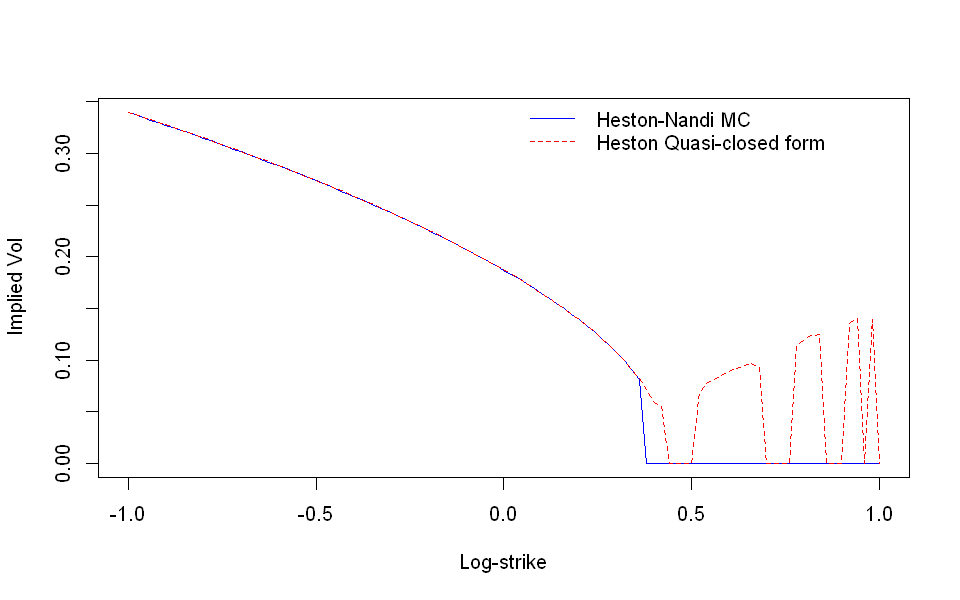

In [8]:
# Plot the two implied variance
options(repr.plot.height=5,repr.plot.width=8)

curve(HNimpVol_var(x),from=-1,to=1,col="blue",ylab="Implied Vol", xlab="Log-strike")
curve(HQCimpVol_var(x),from=-1,to=1,col="red",add=T,lty=2)
legend("topright",c("Heston-Nandi MC","Heston Quasi-closed form"),lty=c(1,2),col=c('blue','red'),
      bty='n', y.intersp=1.5,cex=1)

<font color='blue'>
#### Answer of (c)

* For simplicity, denote $\varphi=\varphi(\theta_t)$

* Set $t=1, k=0, \theta_1=\theta$, we have:

\begin{eqnarray}
\sigma_{\text{BS}}^2(0,1) &=& w(0,\theta_1) \\
&=& \frac{\theta_1}{2}\,(1 + 1) \\
&=& \theta
\end{eqnarray}

* As
\begin{eqnarray}
\p_k \sigma_{\text{BS}}^2(k,1) &=& \frac{\theta_1}{2}(\rho\varphi + \frac{2(\varphi\,k+\rho)\varphi}{2\,\sqrt{(\varphi\,k + \rho)^2 + (1-\rho^2)}})
\end{eqnarray}

* Therefore, ATM variance skew is:
\begin{eqnarray}
\p_k \sigma_{\text{BS}}^2(k,1)|_{k=0} &=& \frac{\theta_1}{2}(\rho\varphi + \rho\varphi)\\
&=& \rho\,\theta\,\varphi
\end{eqnarray}

<font color='blue'>
#### Answer of (d)

Plug $\rho=-1$ into SSVI formula, we have:
$$
\begin{eqnarray*}
w(k,\theta_t)
&=& \frac{\theta_t}{2}\left\{1 - \varphi(\theta_t) k + \sqrt{\left(\varphi(\theta_t){k} - 1\right)^2
}\right\}\\
&=&
\begin{cases} 
      0 & \varphi(\theta_t){k} - 1 \geq 0 \\
      \theta_t(1 - \varphi(\theta_t) k) & \text{otherwise}
\end{cases}
\end{eqnarray*}
$$

<font color='blue'>
#### Answer of (e)

In [9]:
# Get ATM implied variance and variance skew
ATM_Var<-HNimpVol(k=0)^2
dk<-0.001
ATM_Skew<-(HNimpVol(k=dk)^2-HNimpVol(k=-dk)^2)/2/dk

In [10]:
# Compute theta and phi
theta <- ATM_Var
phi <- -ATM_Skew/theta
cat("Theta is: ",theta,"\n")
cat("Phi is: ",phi,"\n")

Theta is:  0.03503774 
Phi is:  2.249687 


In [11]:
# Implement SSVI
SSVI_fit<-function(k){
    if(phi*k>=1){
        return(0)
    }
    else{
        return(sqrt(theta*(1-phi*k)))
    }
}
SSVI_ImpVol_var<-function(k){sapply(k,SSVI_fit)}

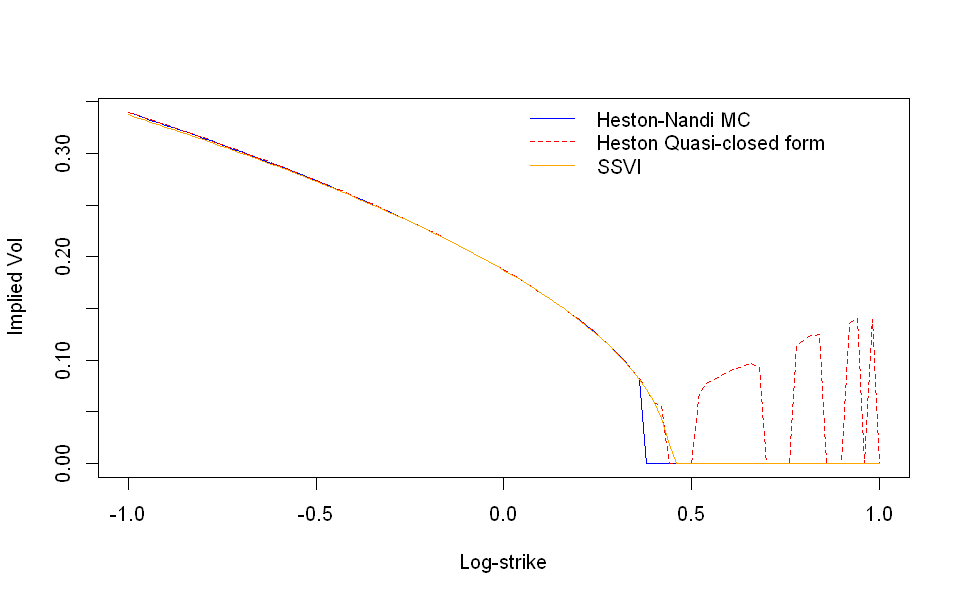

In [12]:
# Plot SSVI along with results in part (b)
options(repr.plot.height=5,repr.plot.width=8)

curve(HNimpVol_var(x),from=-1,to=1,col="blue",ylab="Implied Vol", xlab="Log-strike")
curve(HQCimpVol_var(x),from=-1,to=1,col="red",add=T,lty=2)
curve(SSVI_ImpVol_var(x),from=-1,to=1,col="orange",add=T,lty=1)
legend("topright",c("Heston-Nandi MC","Heston Quasi-closed form","SSVI"),lty=c(1,2,1),col=c('blue','red','orange'),
      bty='n', y.intersp=1.5,cex=1)

### Numerical check of local volatility formula

### 2. (6 points) 

Using  the $x$ and $v$ samples you generated in Problem 1, numerically estimate the local volatility function

[(3)](#eq:lvNumerical)
$$
v_L(x,1)=\E[v_1|x_1=x]
$$

Plot local variance $v_L(x,1)$ as a function of $x$ from $x=-0.5$ to $x=+0.5$.  As in HW4, I recommend just binning the data.  Superimpose a graph of formula [(1)](#eq:Hestonlv).  Verify agreement of [(1)](#eq:Hestonlv) and [(3)](#eq:lvNumerical).

<font color='blue'>
### Answer of Q2

In [13]:
# Get the samples
xv<-data.frame(cbind(sample$x,sample$v))
colnames(xv)<-c("x","v")
x_min<-min(xv[,"x"])
x_max<-max(xv[,"x"])
# Bin size
bins<-100
itv<-(x_max-x_min)/bins

In [14]:
# Define the function
MClocalVol<-function(x){
    i<-floor((x-x_min)/itv)
    xl<-x_min+i*itv
    xh<-x_min+(i+1)*itv
    xv.subset<-subset(xv,x>=xl & x<xh)
    v_mean<-mean(xv.subset[,"v"])
    v_std<-sd(xv.subset[,"v"])/sqrt(dim(xv.subset)[1])
    return(cbind(v_mean,v_std))
}

localVol<-function(x){
    lambdap<-lambda+eta/2
    vbarp<-vbar*lambda/lambdap
    res<-(v0-vbarp)*exp(-lambdap)+vbarp-eta*x*((1-exp(-lambdap))/lambdap)
    res<-res*(res>0)
    return(res)
}

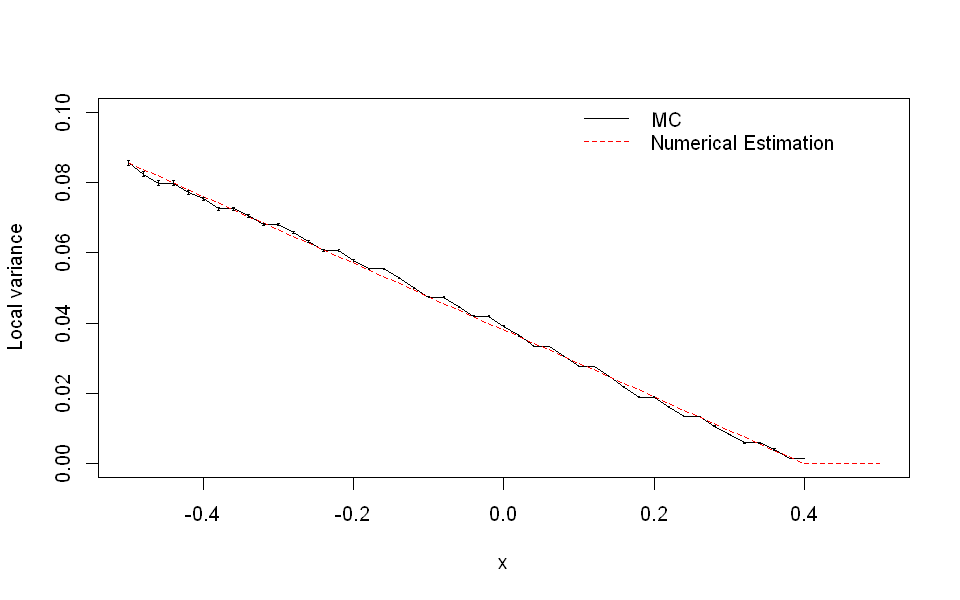

In [15]:
# Plot the result
options(repr.plot.height=5,repr.plot.width=8)
x<-seq(-0.5,0.5,0.02)
ImpVol_MC<-sapply(x,MClocalVol)
ImpVol<-sapply(x,localVol)

plot(x,ImpVol_MC[1,],type="l",col="black",xlab="x",ylim=c(0,0.1),ylab="Local variance")
lines(x,ImpVol,col="red",lty=2)

### add error bars
dx<-0.001
for(i in 1:length(x)) {
    high<-ImpVol_MC[1,i]+ImpVol_MC[2,i]
    low<-ImpVol_MC[1,i]-ImpVol_MC[2,i]
    segments(x[i],low,x[i],high)
    segments(x[i]-dx, high , x[i]+dx, high)
    segments(x[i]-dx, low , x[i]+dx, low)
}
legend("topright",c("MC","Numerical Estimation"),lty=c(1,2),col=c('black','red'),
      bty='n', y.intersp=1.5,cex=1)

## Local volatility simulation

### 3. (10 points) 

Amend the Monte Carlo code of Problem 1 to generate a vector of $x=\log S_T/S_0$ assuming the local volatility process:

$$
dx=-\frac{1}{2}\,v_L(x,t)\,dt+\sqrt{v_L(x,t)}\,dZ
$$

with the approximate formula [(1)](#eq:Hestonlv) for local variance.  Again, with 2 million paths and 128 steps, plot the 1-year volatility smile for log-strikes between $-1.0$ and $1.0$.  Superimpose this smile on the Heston implied volatility smiles generated in Problem 1.  

<font color='blue'>
### Answer of Q3

In [16]:
# Define the local vol function
localVol<-function(x,t){
    lambdap<-lambda+eta/2
    vbarp<-vbar*lambda/lambdap
    res<-(v0-vbarp)*exp(-lambdap*t)+vbarp-eta*x*((1-exp(-lambdap*t))/lambdap/t)
    res<-res*(res>0)
    return(res)
}

# local vol MC (return vectors of x)
HestonMC2 <- function(params){
    res <- function(T, N, m)
    {
  
    lambda <<- params$lambda;
    rho <<- params$rho;
    eta <<- params$eta;
    vbar <<- params$vbar;
    v0 <<- params$v;
    
    n <- m*2 #n is number of timesteps = 2*m so we can use Romberg extrapolation
  
    # We use a vertical array, one element per M.C. path
    x <- rep(0,N);
  
    for (i in 1:n)
    {
        W1 <- rnorm(N);
        W1 <- W1 - mean(W1);W1 <- W1/sd(W1);
        
        t<-i*T/n
        LV<-localVol(x,t)
        x <- x-0.5*LV*T/n+sqrt(LV)*W1*sqrt(T/n)
        x <- x - log(mean(exp(x)))
   }
    return(x)
}
    return(res)
}

In [17]:
# Same to Problem 1
# Parameters
paramsHN<-list(v=0.04,vbar=0.04,lambda=10,eta=1,rho=-1)
N=2000000
m=64

In [18]:
# Generate 2nd samples
# T=1Y
sample2<-HestonMC2(paramsHN)(T=1, N, m)

In [19]:
# Implied vol through local vol MC
LV_ImpVol<-function(k){
    K<-exp(k)
    S<-exp(sample2)
    C<-mean((S-K)*(S>K))
    return(BSImpliedVolCall(1, K, T=1, r=0, C))
}
LV_ImpVol_var<-function(k){sapply(k,LV_ImpVol)}

In [ ]:
# Plot the result
options(repr.plot.height=5,repr.plot.width=8)

curve(HNimpVol_var(x),from=-1,to=1,col="blue",ylab="Implied Vol", xlab="Log-strike")
curve(HQCimpVol_var(x),from=-1,to=1,col="red",add=T,lty=2)
curve(LV_ImpVol_var(x),from=-1,to=1,col="orange",add=T,lty=1)
legend("topright",c("Heston-Nandi MC","Heston Quasi-closed form","Local Volatility"),lty=c(1,2,1),col=c('blue','red','orange'),
      bty='n', y.intersp=1.5,cex=1)

## Intuition

### 4. (4 points) 


From the results of your computations, you should see that the local
volatility model and the stochastic volatility model price one year
European options almost identically.  Also, because  $\rho=-1$, both the Heston model of Problem 1 and the local volatility model of Problem 2 are only one-factor, depending only on stock prices. Are there any
differences between the two models? If so, what are these differences?

#### Solution

The two models price European options identically but are quite different models.  The local volatility model is Markov in the stock price; the Heston-Nandi model is not.  The Heston-Nandi model is Markov in the spot and the instantaneous variance $v$ which is now itself a function of the historical path of the stock price.

<font color='blue'>
### Answer of Q4

* From the figure in Q3, we can say that the two models price European options almost identically. However, they are different models.


* After setting $\rho=-1$, both models are only depending on stock prices. The stock price is a Markov process under local volatility model, but not in Heston model. However, the stock price together with instantaneous variance $v$ is a Markov process.


* In addition, the skew will be flatter in the future under local volatility model, but it is time-homogeneous under Heston model.

## Postscript

You now have working Heston-Nandi stochastic volatility and local volatility codes.  We will use these later to check our intuition for the impact of dynamical assumptions on the pricing of exotic options.

In [ ]:
print('The running time of the notebook is: ')
proc.time()-ptm